In [1]:
from __future__ import division, print_function
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score


import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

test_size = 0.3
random_state = 4444

/Users/mrapp/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Challenge 7

## Q1

In [2]:
cols = ['class','handi','water','adopt','phy-fee',
        'elaid','rel','sat-ban','contras','missile',
        'immi', 'synfuel','edspend','supersue',
        'crime','duty','exsa']
df = pd.read_csv('house-votes-84.data', header=0, names = cols )



In [3]:
df = df.replace('y', 1).replace('n', 0)

In [4]:
df.head()

,class,handi,water,adopt,phy-fee,elaid,rel,sat-ban,contras,missile,immi,synfuel,edspend,supersue,crime,duty,exsa
0,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
1,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
2,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
3,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1
4,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1


In [5]:
for col in cols[1:]:
    mean = df[df[col]!='?'][col].mean()
    df[col] = df[col].replace('?', mean)

## Q2

In [6]:

X = df.iloc[:,1:]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
        test_size=test_size, random_state = random_state)


## Q3

In [7]:
knn_scores = []
max_k = 303

for k in range(1,max_k):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    knn_scores.append(knn.score(X_test, y_test))

print(max(enumerate(knn_scores), key = lambda x: x[1])[0]+1, 'neighbors performs best')

12 neighbors performs best


## Q4

In [8]:
lr_model = LogisticRegression(C=1000000)
lr_model.fit(X_train, y_train, )
lr_score = lr_model.score(X_test, y_test)
lr_score

0.95419847328244278

## Q5

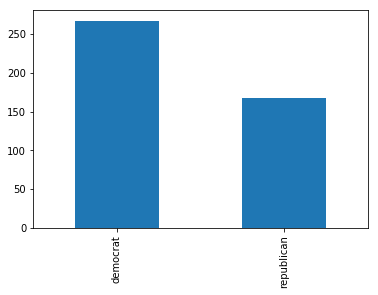

In [9]:
df['class'].value_counts().plot(kind='bar');

In [10]:
def simple_dem(X):
    return ['democrat' for i in range(X.shape[0])]
def simple_rep(X):
    return ['republican' for i in range(X.shape[0])]

In [11]:
y_pred = simple_dem(X_test)
dem_score = sum(y_pred==y_test)/len(y_test)
dem_score

0.60305343511450382

In [12]:
y_pred = simple_rep(X_test)
rep_score = sum(y_pred==y_test)/len(y_test)
rep_score

0.39694656488549618

## Q6

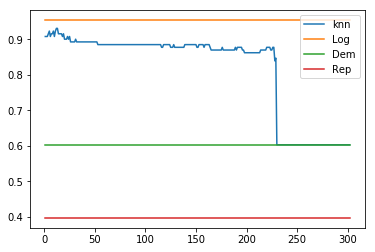

In [13]:

line = range(1,max_k)
plt.plot(line, knn_scores, label = 'knn')
plt.plot(line, np.ones_like(line)*lr_score, label='Log')
plt.plot(line, np.ones_like(line)*dem_score, label='Dem')
plt.plot(line, np.ones_like(line)*rep_score, label='Rep')
plt.legend()

In [14]:
print(sum(y_train=='republican'), sum(y_train=='democrat'))

115 188


In [15]:
train_size, train_scores, test_scores = learning_curve(lr_model, X, y, cv=5)

## Q7

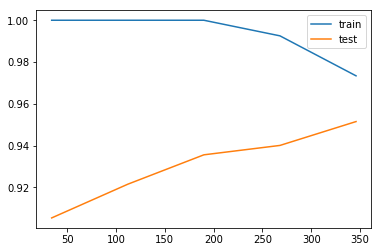

In [16]:
mean_train_scores = np.mean(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)
plt.plot(train_size, mean_train_scores, label = 'train')
plt.plot(train_size, mean_test_scores, label = 'test')
plt.legend()

## Q8

In [17]:
models = ['GaussianNB', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier']

for model_name in models:
    exec('model = '+ model_name + '()')
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    print(model_name + ' accuracy: ' + str(score))

GaussianNB accuracy: 0.908396946565
SVC accuracy: 0.954198473282
DecisionTreeClassifier accuracy: 0.923664122137
RandomForestClassifier accuracy: 0.93893129771


## Q9

In [18]:
models = ['GaussianNB', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier']

for model_name in models:
    exec('model = '+ model_name + '()')
    scores = cross_val_score(model, X, y, cv=5)
    avg_score = np.mean(scores)
    print(model_name + ' accuracy: ' + str(avg_score))

GaussianNB accuracy: 0.940010570825
SVC accuracy: 0.953858350951
DecisionTreeClassifier accuracy: 0.937737843552
RandomForestClassifier accuracy: 0.953752642706


## Q10

In [19]:
cols = ['party','handi','water','adopt','phy-fee','elaid','rel','sat-ban','contras','missile','immi', 'synfuel','edspend','supersue','crime','duty','exsa']
df = pd.read_csv('house-votes-84.data', header=0, names = cols )

df = df.replace('y', 1).replace('n', 0)
df = df.replace('democrat', 1).replace('republican', 0)

In [20]:
df = df.replace('?', np.NAN).fillna(df.mode().iloc[0])

In [21]:
cols.remove('handi')
X = df.loc[:, cols]
y = df['handi']

In [22]:
cross_val_score(lr_model, X, y, cv=5)
avg_score = np.mean(scores)
avg_score

0.95375264270613103

## Q11

In [23]:
df = pd.read_csv('2013_movies.csv').dropna()

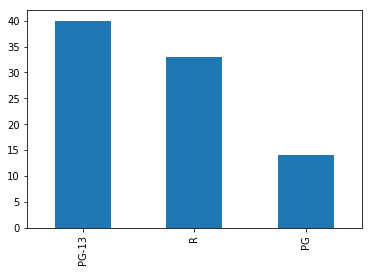

In [24]:
df['Rating'].value_counts().plot(kind='bar');

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 99
Data columns (total 7 columns):
Title                 87 non-null object
Budget                87 non-null float64
DomesticTotalGross    87 non-null int64
Director              87 non-null object
Rating                87 non-null object
Runtime               87 non-null int64
ReleaseDate           87 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.4+ KB


In [26]:
cont_var = ['Budget', 'DomesticTotalGross', 'Runtime']

X = df.loc[:,cont_var]
y = df.Rating


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
        test_size=test_size, random_state = random_state)

In [28]:
knn_scores = []
max_k = 20
accuracies = []
for k in range(1,max_k):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    knn_scores.append(knn.score(X_test, y_test))
    accuracies.append((knn.score(X_test, y_test), k))
print(max(accuracies)[1], 'neighbors performs best')

5 neighbors performs best


In [29]:
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.44444444444444442

In [30]:
def simple_pg_thir(X):
    return ['PG-13' for i in range(X.shape[0])]

In [31]:
y_pred = simple_pg_thir(X_test)
sum(y_pred==y_test)/len(y_test)

0.40740740740740738

knn does the best but nothing is much better than the simple predictor.

In [32]:
zip(X.columns,lr_model.coef_)

[('Budget', array([ -1.46124379e-08,  -1.93897623e-09,  -1.75965536e-13])),
 ('DomesticTotalGross',
  array([  1.49848414e-08,  -6.42667083e-09,  -9.13751595e-14])),
 ('Runtime', array([ -2.30763200e-08,   5.12598612e-09,   1.16458130e-13]))]

In [33]:
pd.DataFrame(lr_model.coef_, columns=X.columns, index=lr_model.classes_)


,Budget,DomesticTotalGross,Runtime
PG,-1.461244e-08,-1.938976e-09,-1.759655e-13
PG-13,1.498484e-08,-6.426671e-09,-9.137516e-14
R,-2.307632e-08,5.125986e-09,1.164581e-13


Higher budgets predict PG-13. Higher domestic total gross and runtime both predict R.

## Q12

In [34]:
cols = ['age', 'year', 'nodes', 'survive']
df = pd.read_csv('haberman.data',  header=0, names = cols )

In [35]:
df['age'].describe()


count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: age, dtype: float64

In [36]:
df.age[df.survive == 1].describe()

count    224.000000
mean      52.116071
std       10.937446
min       30.000000
25%       43.000000
50%       52.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [37]:
df.age[df.survive == 2].describe()

count    81.000000
mean     53.679012
std      10.167137
min      34.000000
25%      46.000000
50%      53.000000
75%      61.000000
max      83.000000
Name: age, dtype: float64

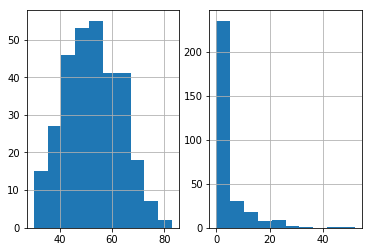

In [38]:
plt.subplot(121)
df.age.hist()
plt.subplot(122)
df.nodes.hist();

In [39]:
df.year.min()

58

In [40]:
df.year.max()

69

In [41]:
feat_cols = ['age', 'year', 'nodes']

X = df.loc[:,feat_cols]
y = df.survive

X_train, X_test, y_train, y_test = train_test_split(X, y, 
        test_size=test_size, random_state = random_state)

lr_model = LogisticRegression(C=100000)


In [42]:
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.75

In [43]:
zip(X.columns, lr_model.coef_[0])

[('age', 0.0089474781072835016),
 ('year', 0.034941031270402441),
 ('nodes', 0.080787149624614099)]

All factors yeild a lower survival chance.

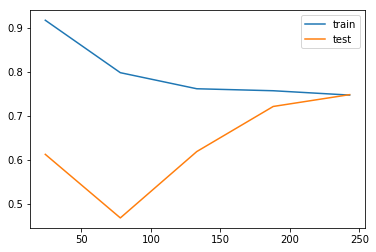

In [44]:
train_size, train_scores, test_scores = learning_curve(lr_model, X, y, cv=5)
mean_train_scores = np.mean(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)
plt.plot(train_size, mean_train_scores, label = 'train')
plt.plot(train_size, mean_test_scores, label = 'test')
plt.legend()